PROJETO

In [3]:
# Realizando a Junção das 12 Tabelas
import pandas as pd
import os
import datetime as dt

In [2]:
# Fazendo a Junção dos arquivos de cada mês em um único CSV
# Caminho da Pasta dos Arquivos
dir_path = r"C:\Users\andre\OneDrive\Área de Trabalho\Projeto YT"
files = os.listdir(dir_path)
df = pd.DataFrame()

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(dir_path, file)
        arq = pd.read_csv(file_path)
        df = pd.concat([df, arq], ignore_index=True)
# Conferindo se Deu certo
display(df)

# salvando o arquivo.csv com os Dados Agrupados
df.to_csv("Dados_2019.csv", index=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
1121095,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
1121096,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
1121097,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
1121098,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
# Importando e Conhecendo o DataFrame
df = pd.read_csv("Dados_2019.csv")
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# Checando os Tipos de Cada Coluna
df_duplicados_duplicados_duplicados_duplicados_duplicados_duplicados_duplicados_duplicados_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121100 entries, 0 to 1121099
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Order ID          1117830 non-null  object
 1   Product           1117830 non-null  object
 2   Quantity Ordered  1117830 non-null  object
 3   Price Each        1117830 non-null  object
 4   Order Date        1117830 non-null  object
 5   Purchase Address  1117830 non-null  object
dtypes: object(6)
memory usage: 51.3+ MB


In [6]:
# Checando valores vazios
df.isnull().sum()

Order ID            3270
Product             3270
Quantity Ordered    3270
Price Each          3270
Order Date          3270
Purchase Address    3270
dtype: int64

In [7]:
df = df.dropna()
df.shape

(1117830, 6)

In [8]:
# Analisando as variáveis da Coluna antes de fazer a conversão
# constatamos um valor repetido 710 vezes quepromoverá um erro
df["Quantity Ordered"].value_counts()

Quantity Ordered
1                   1011312
2                     79944
3                     17520
4                      4836
Quantity Ordered       2130
5                      1416
6                       480
7                       144
8                        30
9                        18
Name: count, dtype: int64

In [9]:
df = df.query("`Quantity Ordered` != 'Quantity Ordered'")
df["Quantity Ordered"].value_counts()

Quantity Ordered
1    1011312
2      79944
3      17520
4       4836
5       1416
6        480
7        144
8         30
9         18
Name: count, dtype: int64

In [10]:
# Agora Alterar os Tipos das variaveis usando o Pandas

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115700 entries, 0 to 1121099
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Order ID          1115700 non-null  object        
 1   Product           1115700 non-null  object        
 2   Quantity Ordered  1115700 non-null  int64         
 3   Price Each        1115700 non-null  float64       
 4   Order Date        1115700 non-null  datetime64[ns]
 5   Purchase Address  1115700 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 59.6+ MB


In [11]:
# Conferindo se ficaram valores Nulos
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
df["Month"] = df["Order Date"].dt.month
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
756744,185477,Lightning Charging Cable,1,14.95,2019-04-19 08:57:00,"839 Ridge St, New York City, NY 10001",4
1529,178013,Wired Headphones,1,11.99,2019-04-04 18:28:00,"6 11th St, Los Angeles, CA 90001",4
508489,207699,AA Batteries (4-pack),1,3.84,2019-05-30 09:27:00,"482 9th St, Seattle, WA 98101",5


In [13]:
df.sample()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
850432,220792,Bose SoundSport Headphones,1,99.99,2019-06-01 10:01:00,"381 7th St, Dallas, TX 75001",6


In [14]:
# Criando a Coluna Sale para Saber o Valor total da Venda
df["Total Sale"] = df["Price Each"] * df["Quantity Ordered"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
df_sumarizado = df.groupby('Month')['Total Sale'].sum().reset_index()
df_sumarizado

,Month,Total Sale
0,1,10933540.38
1,2,13212134.52
2,3,16842602.28
3,4,20344021.44
4,5,18915640.50
5,6,15466813.56
6,7,15886654.56
7,8,13466807.28
8,9,12585360.78
9,10,22420361.28


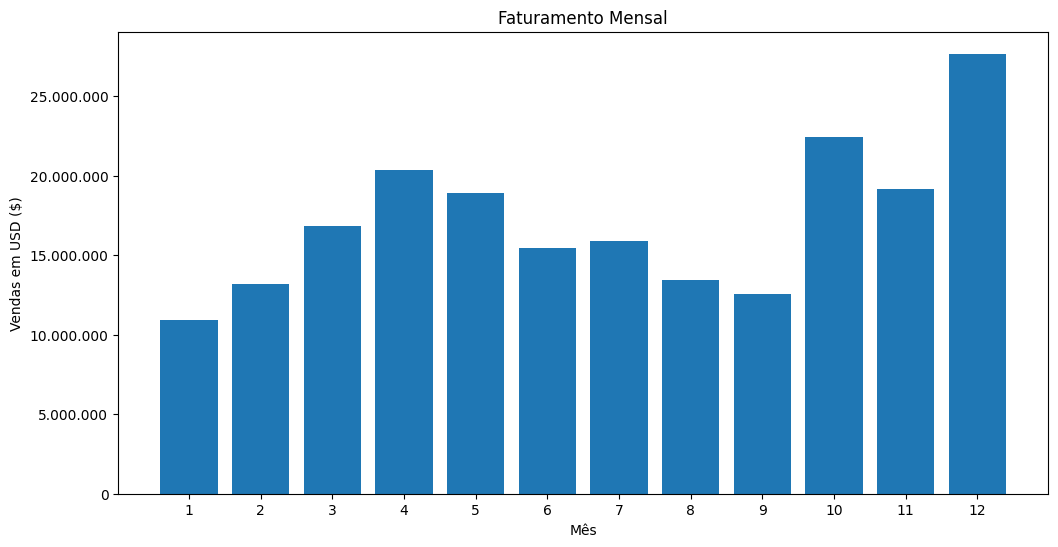

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


plt.figure(figsize=(12, 6))
plt.bar(df_sumarizado["Month"], df_sumarizado["Total Sale"])
plt.xticks(df_sumarizado["Month"])
plt.ylabel("Vendas em USD ($)")
plt.xlabel("Mês")
plt.title("Faturamento Mensal")
formatter = FuncFormatter(lambda x, pos: f'{int(x):,d}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)


Com esse Gráfico podemos Analisar o Faturamento por Mês no Ano de 2019, podendo ser útil para instituuir políticas para os meses nos anos fúturos em que seja pertinente para a Empresa

In [17]:
#ANALISANDO VENDAS POR CIDADE CRIANDO A COLUNA City
#Para isso Vamos usar o Método Apply
#definindo uma função para separar o índice após a primeira vírgula e antes da Segunda
def separar_cidade(endereço):
    return endereço.split(",")[1]

def separar_estado(endereço):
    return endereço.split(",")[2][1:3]

df["City"] = df["Purchase Address"].apply(lambda x: f"{separar_cidade(x)} ({separar_estado(x)})")
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City
411649,302870,Vareebadd Phone,1,400.00,2019-12-01 08:27:00,"319 Jefferson St, Seattle, WA 98101",12,400.00,Seattle (WA)
236288,313860,Flatscreen TV,1,300.00,2019-12-30 00:02:00,"263 11th St, Los Angeles, CA 90001",12,300.00,Los Angeles (CA)
981011,311311,Lightning Charging Cable,1,14.95,2019-12-04 15:36:00,"788 Sunset St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
151350,292392,USB-C Charging Cable,1,11.95,2019-11-22 20:47:00,"647 Center St, Austin, TX 73301",11,11.95,Austin (TX)
749351,178415,Google Phone,1,600.00,2019-04-08 20:25:00,"540 Washington St, New York City, NY 10001",4,600.00,New York City (NY)


In [18]:
#Analisando Vendas por City
vendas_por_cidade = df.groupby(df["City"])["Total Sale"].sum().reset_index().sort_values(by="Total Sale",ascending=False)
vendas_por_cidade

,City,Total Sale
8,San Francisco (CA),49573223.46
4,Los Angeles (CA),32715424.80
5,New York City (NY),27985904.58
2,Boston (MA),21969852.06
0,Atlanta (GA),16772991.48
3,Dallas (TX),16607852.40
9,Seattle (WA),16486532.88
7,Portland (OR),11224394.04
1,Austin (TX),10917490.50
6,Portland (ME),2698549.62


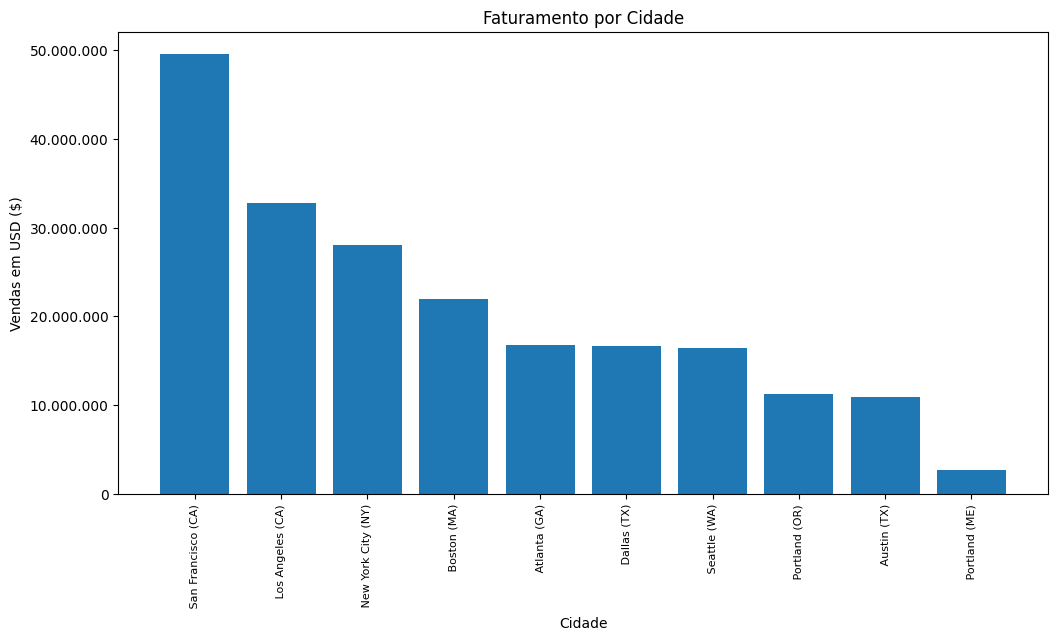

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(vendas_por_cidade["City"], vendas_por_cidade["Total Sale"])
plt.xticks(vendas_por_cidade["City"],rotation = "vertical",size = 8)
plt.ylabel("Vendas em USD ($)")
plt.xlabel("Cidade")
plt.title("Faturamento por Cidade")
formatter = FuncFormatter(lambda x, pos: f'{int(x):,d}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)


Podemos Avaliar Com esse gráfico o desempenho de Vendas em Cada Cidade e assim instituir políticas de vendas como Ações e Promoções em Áreas de Interesse da Empresa

In [20]:
#Analisando as Vendas pela Hora do Dia
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)


In [21]:
df["Hour"] = df["Order Date"].dt.hour
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City,Hour
854643,163895,Lightning Charging Cable,1,14.95,2019-03-22 22:04:00,"91 Wilson St, San Francisco, CA 94016",3,14.95,San Francisco (CA),22
461399,232887,Wired Headphones,1,11.99,2019-07-31 14:06:00,"334 Highland St, Atlanta, GA 30301",7,11.99,Atlanta (GA),14
1085838,292623,Bose SoundSport Headphones,1,99.99,2019-11-24 15:02:00,"436 Madison St, Boston, MA 02215",11,99.99,Boston (MA),15


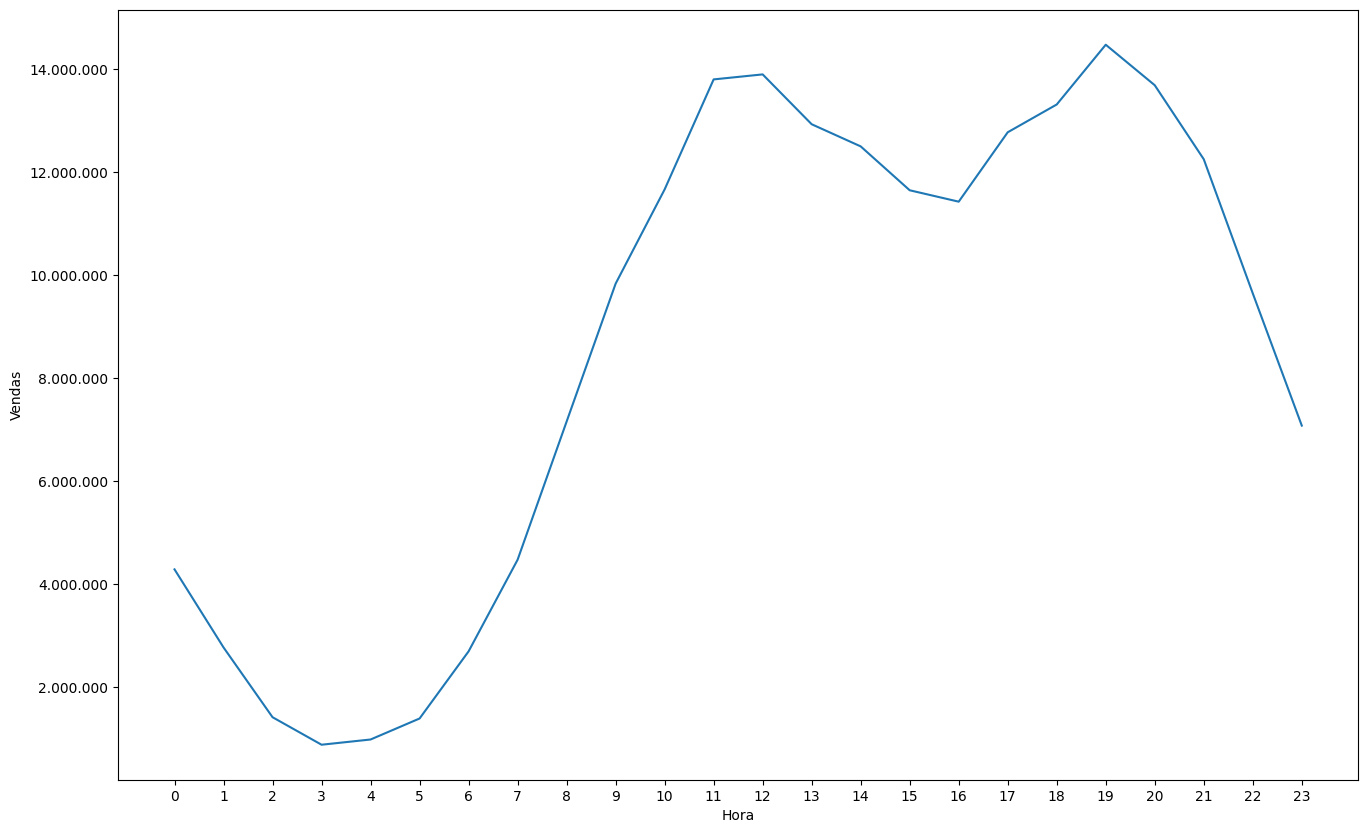

In [22]:
import seaborn as sns
vendas_por_hora = df.groupby("Hour")["Total Sale"].sum().reset_index()
vendas_por_hora
plt.figure(figsize=(16,10))
sns.lineplot(x=vendas_por_hora["Hour"],y=vendas_por_hora["Total Sale"])
plt.ylabel("Vendas")
plt.xlabel("Hora")
plt.xticks(vendas_por_hora["Hour"])
formatter = FuncFormatter(lambda x, pos: f'{int(x):,d}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

Podemos Avaliar Com esse gráfico em que o Momento do Pico de Vendas está entre 11:00 e 19:00, nos permitindo assim instituir ações em que podemos manipular esses números como por exemplo, enviar anúncios em horários em que a empresa decidir melhorar e aumentar as vendas

Agora Vamos Avaliar as vendas dos Produtos

In [49]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [51]:
Faturamento_por_produto = df.groupby(df["Product"])["Total Sale"].sum().reset_index().sort_values(by="Total Sale",ascending=False)
Faturamento_por_produto

,Product,Total Sale
13,Macbook Pro Laptop,48225600.00
18,iPhone,28765800.00
14,ThinkPad Laptop,24779752.20
9,Google Phone,19915200.00
1,27in 4K Gaming Monitor,14610585.36
3,34in Ultrawide Monitor,14133348.06
6,Apple Airpods Headphones,14094900.00
8,Flatscreen TV,8674200.00
7,Bose SoundSport Headphones,8073392.58
2,27in FHD Monitor,6794547.00


In [55]:
QTD_Produtos_vendidos = df.groupby(df["Product"])["Quantity Ordered"].sum().reset_index().sort_values(by="Quantity Ordered",ascending=False)
QTD_Produtos_vendidos

,Product,Quantity Ordered
5,AAA Batteries (4-pack),186102
4,AA Batteries (4-pack),165810
15,USB-C Charging Cable,143850
12,Lightning Charging Cable,139302
17,Wired Headphones,123342
6,Apple Airpods Headphones,93966
7,Bose SoundSport Headphones,80742
2,27in FHD Monitor,45300
18,iPhone,41094
1,27in 4K Gaming Monitor,37464


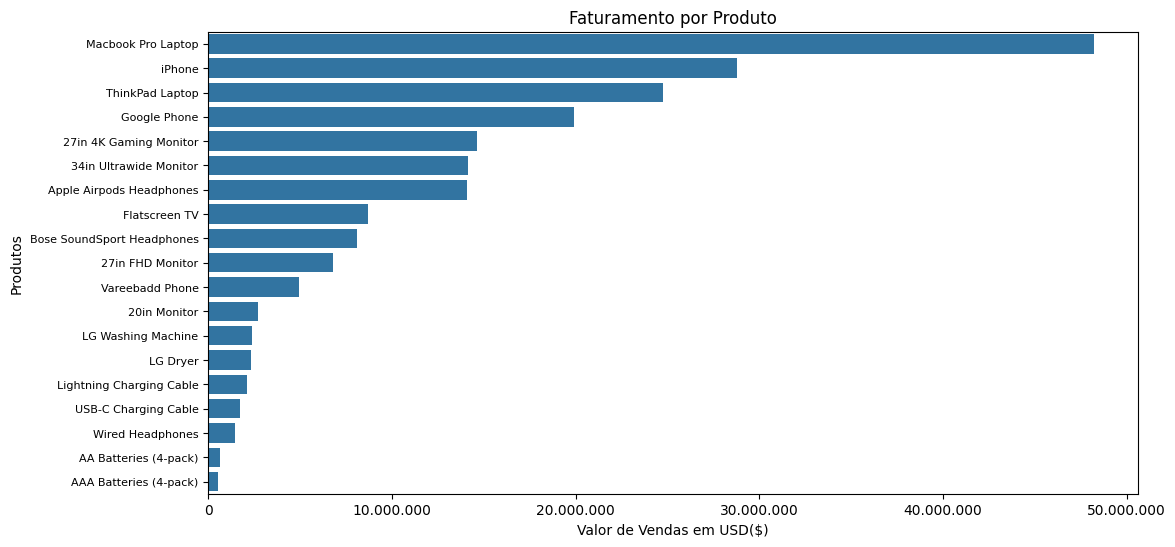

In [64]:
plt.figure(figsize=(12, 6))

sns.barplot(x="Total Sale", y="Product", data=Faturamento_por_produto)
plt.yticks(size = 8)
plt.xlabel("Valor de Vendas em USD($)")
plt.ylabel("Produtos")

# Alterando o título para refletir o gráfico horizontal
plt.title("Faturamento por Produto")
formatter = FuncFormatter(lambda x, pos: f'{int(x):,d}'.replace(',', '.'))
plt.gca().xaxis.set_major_formatter(formatter)

# Exibindo o gráfico
plt.show()


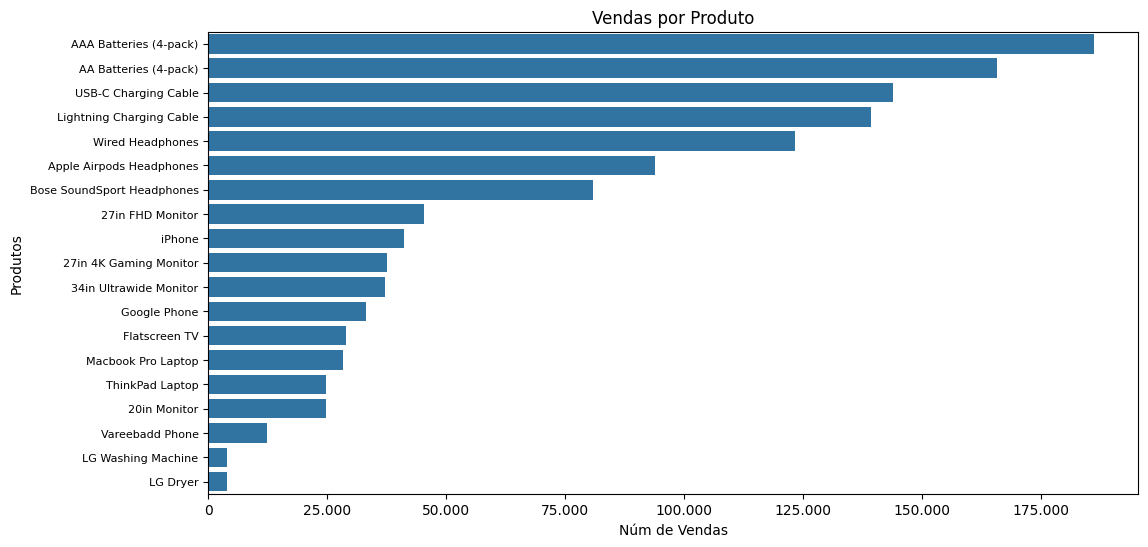

In [65]:
plt.figure(figsize=(12, 6))

sns.barplot(x="Quantity Ordered", y="Product", data=QTD_Produtos_vendidos)
plt.yticks(size = 8)
plt.xlabel("Núm de Vendas")
plt.ylabel("Produtos")

# Alterando o título para refletir o gráfico horizontal
plt.title("Vendas por Produto")
formatter = FuncFormatter(lambda x, pos: f'{int(x):,d}'.replace(',', '.'))
plt.gca().xaxis.set_major_formatter(formatter)

# Exibindo o gráfico
plt.show()


Agora Vamos Analisar os Produtos que São Comprados Juntos (Na mesma Compra)

In [89]:
df_duplicados = df[df['Order ID'].duplicated(keep=False)]

df_duplicados = df_duplicados[["Order ID","Product"]]
df_duplicados

,Order ID,Product
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,Google Phone
4,176560,Wired Headphones
5,176561,Wired Headphones
...,...,...
1121095,259353,AAA Batteries (4-pack)
1121096,259354,iPhone
1121097,259355,iPhone
1121098,259356,34in Ultrawide Monitor


In [90]:
grouped_products = df_duplicados.groupby('Order ID')['Product'].apply(lambda x: ','.join(x)).reset_index(name='All Products')


In [91]:
grouped_products

,Order ID,All Products
0,141234,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone"
1,141235,"Lightning Charging Cable,Lightning Charging Ca..."
2,141236,"Wired Headphones,Wired Headphones,Wired Headph..."
3,141237,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,141238,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...
178432,319666,"Lightning Charging Cable,Lightning Charging Ca..."
178433,319667,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
178434,319668,"Vareebadd Phone,Vareebadd Phone,Vareebadd Phon..."
178435,319669,"Wired Headphones,Wired Headphones,Wired Headph..."


In [95]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped_products['All Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 330273
('Lightning Charging Cable', 'Lightning Charging Cable') 326814
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 311343
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 309915
('Wired Headphones', 'Wired Headphones') 284490
('Apple Airpods Headphones', 'Apple Airpods Headphones') 234099
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 200847
('27in FHD Monitor', '27in FHD Monitor') 112929
('iPhone', 'iPhone') 102702
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 93630


Com essa Análise mais Aprofundada, nos permitimos criar uma espécie de Sistema de Recomendação Analisando os Produtos que Geralmente são comprados de Forma Conjunta